---
## **Big Mart Sales Prediction using XGBoost Regression**
## **by: Harrish Ragavendar S**
---

### **Importing the Libraries**

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### **Reading the Dataset**

In [377]:
train_data = pd.read_csv("Train.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **Analysing the Dataset**

In [378]:
train_data.shape

(8523, 12)

In [379]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [380]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [381]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### **Handling Missing Values**

In [382]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [383]:
mode = train_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [384]:
missing_outlet_size = train_data['Outlet_Size'].isna()

In [385]:
train_data.loc[missing_outlet_size, 'Outlet_Size'] = train_data.loc[missing_outlet_size,'Outlet_Type'].apply(lambda x: mode[x])

In [386]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### **Data Visualisation**

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

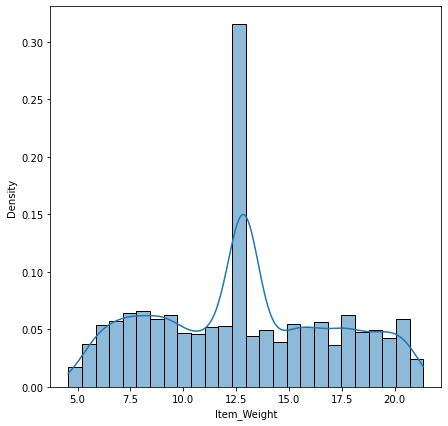

In [387]:
plt.figure(figsize=(7,7))
sns.histplot(train_data['Item_Weight'],kde=True,stat="density")

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

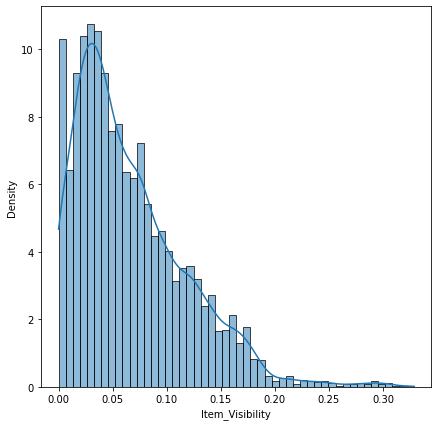

In [388]:
plt.figure(figsize=(7,7))
sns.histplot(train_data['Item_Visibility'],kde=True,stat="density")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

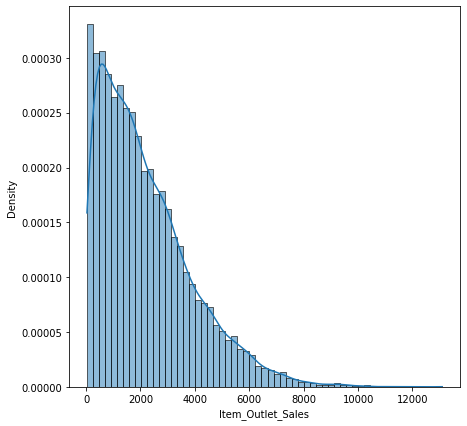

In [389]:
plt.figure(figsize=(7,7))
sns.histplot(train_data['Item_Outlet_Sales'],kde=True,stat="density")

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

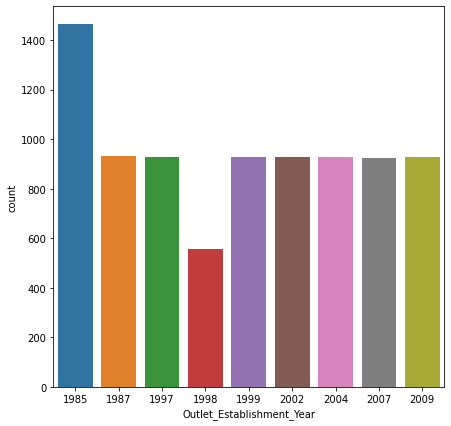

In [390]:
plt.figure(figsize=(7,7))
sns.countplot(x='Outlet_Establishment_Year',data=train_data)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

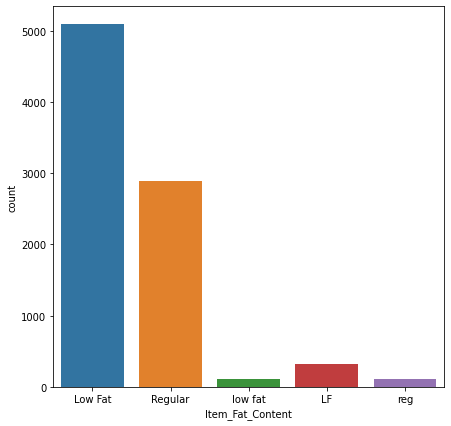

In [391]:
plt.figure(figsize=(7,7))
sns.countplot(x='Item_Fat_Content',data=train_data)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

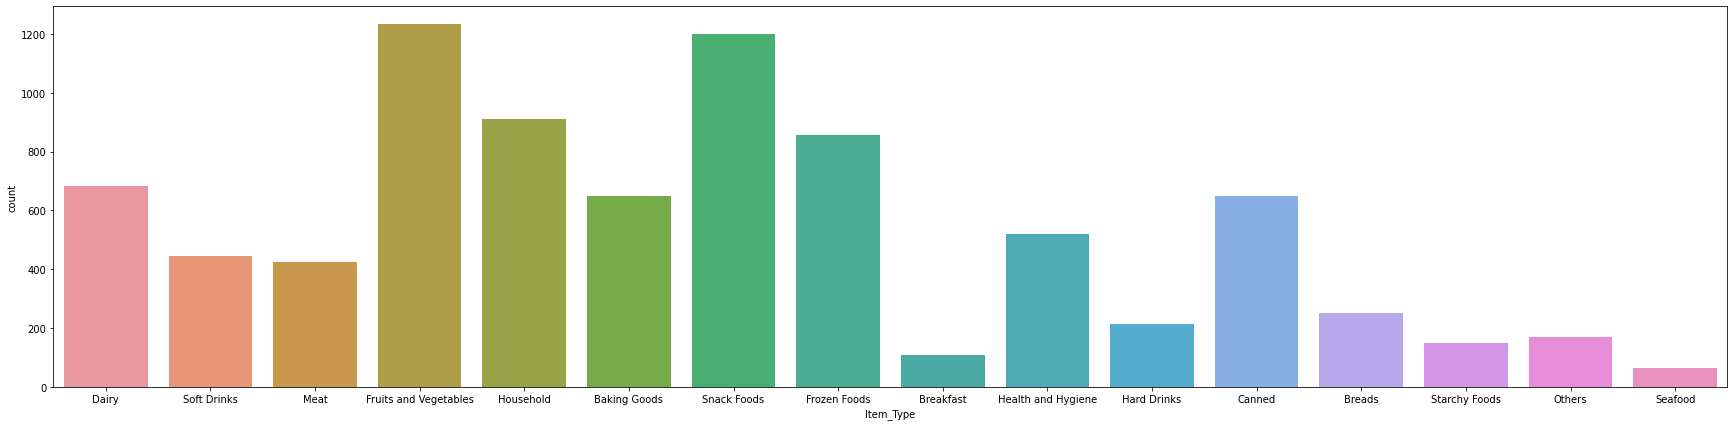

In [392]:
plt.figure(figsize=(30,7))
sns.countplot(x='Item_Type',data=train_data)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

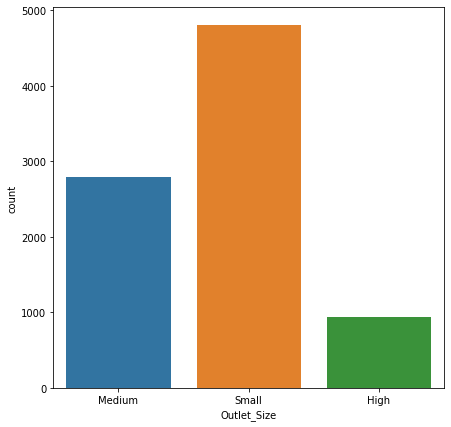

In [393]:
plt.figure(figsize=(7,7))
sns.countplot(x='Outlet_Size',data=train_data)

### **Data Cleaning**

In [394]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [395]:
train_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [396]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### **Label Encoding**

In [397]:
encoder = LabelEncoder()

In [398]:
train_data['Item_Identifier'] = encoder.fit_transform(train_data['Item_Identifier'])

In [399]:
train_data['Item_Fat_Content'] = encoder.fit_transform(train_data['Item_Fat_Content'])

In [400]:
train_data['Item_Type'] = encoder.fit_transform(train_data['Item_Type'])

In [401]:
train_data['Outlet_Identifier'] = encoder.fit_transform(train_data['Outlet_Identifier'])

In [402]:
train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])

In [403]:
train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])

In [404]:
train_data['Outlet_Type'] = encoder.fit_transform(train_data['Outlet_Type'])

In [405]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### **Splitting the Dataset as training and testing sets**

In [406]:
X = train_data.drop(columns='Item_Outlet_Sales',axis=1)
y = train_data['Item_Outlet_Sales']

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [408]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (5966, 11) (2557, 11)


### **Model Training**

In [409]:
regressor = XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [410]:
train_predicted = regressor.predict(X_train)

In [411]:
test_predicted = regressor.predict(X_test)

### **R^2 value for Training Data**

In [412]:
r2_train = metrics.r2_score(y_train,train_predicted)
r2_train = metrics.r2_score(y_train,train_predicted)

### **R^2 value for Testing Data**

In [413]:
r2_test = metrics.r2_score(y_test,test_predicted)
r2_test

0.5242880004842898

### **Using our model for predicting the given Test Dataset**

### **Reading the Test Dataset**

In [414]:
test_data = pd.read_csv('Test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### **Data Preprocessing**

### *i)Replacing the missing values*

In [415]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [416]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)

In [417]:
mode = test_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [418]:
missing_outlet_size = test_data['Outlet_Size'].isna()

In [419]:
test_data.loc[missing_outlet_size, 'Outlet_Size'] = test_data.loc[missing_outlet_size,'Outlet_Type'].apply(lambda x: mode[x])

In [420]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### *ii)Data Cleaning*

In [421]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [422]:
test_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}},inplace=True)

In [423]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### **Label Encoding**

In [424]:
encoder = LabelEncoder()

In [425]:
test_data['Item_Identifier'] = encoder.fit_transform(test_data['Item_Identifier'])

In [426]:
test_data['Item_Fat_Content'] = encoder.fit_transform(test_data['Item_Fat_Content'])

In [427]:
test_data['Item_Type'] = encoder.fit_transform(test_data['Item_Type'])

In [428]:
test_data['Outlet_Identifier'] = encoder.fit_transform(test_data['Outlet_Identifier'])

In [429]:
test_data['Outlet_Size'] = encoder.fit_transform(test_data['Outlet_Size'])

In [430]:
test_data['Outlet_Location_Type'] = encoder.fit_transform(test_data['Outlet_Location_Type'])

In [431]:
test_data['Outlet_Type'] = encoder.fit_transform(test_data['Outlet_Type'])

In [432]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


### **Prediction using our Model**

In [433]:
predicted_values = regressor.predict(test_data)

In [434]:
test_data['Predicted_Item_Outlet_Sales'] = predicted_values
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Item_Outlet_Sales
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,1534.763184
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1,1210.936035
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0,-106.996605
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1,2677.845459
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3,5910.282715


### **Storing the Predicted value into a new CSV File "Predicted.csv"**

In [435]:
test_data.to_csv("Predicted.csv")

---